In [18]:
# Open the dataset and display it

words = open('datasets/names.txt', 'r').read().splitlines()
print(words[:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [19]:
# Display the length of words, its max, and its min

print(len(words))

print(min(len(w) for w in words))

print(max(len(w) for w in words))

32033
2
15


# Part 1 - Coding the Bigram Model by hand.

Think of the bigram as a sliding window that always sees two characters of a string. It takes an input the first character of the two and predicts what the following character should be as an output.

In [20]:
# The Bigram Model

import pandas as p

pairs = p.DataFrame(
    0,
    index=['#'] + [chr(i + 97) for i in range(0, 26)] + ['#'],
    columns=['#'] + [chr(i + 97) for i in range(0, 26)] + ['#']
)
for w in words:
    chars = ['#'] + list(w) + ['#']
    for c1, c2 in zip(chars, chars[1:]):
        pairs.loc[c1, c2] += 1

print(pairs)

      #     a     b     c     d     e    f    g     h     i  ...     r     s  \
#     0  4410  1306  1542  1690  1531  417  669   874   591  ...  1639  2055   
a  6640   556   541   470  1042   692  134  168  2332  1650  ...  3264  1118   
b   114   321    38     1    65   655    0    0    41   217  ...   842     8   
c    97   815     0    42     1   551    0    2   664   271  ...    76     5   
d   516  1303     1     3   149  1283    5   25   118   674  ...   424    29   
e  3983   679   121   153   384  1271   82  125   152   818  ...  1958   861   
f    80   242     0     0     0   123   44    1     1   160  ...   114     6   
g   108   330     3     0    19   334    1   25   360   190  ...   201    30   
h  2409  2244     8     2    24   674    2    2     1   729  ...   204    31   
i  2489  2445   110   509   440  1653  101  428    95    82  ...   849  1316   
j    71  1473     1     4     4   440    0    0    45   119  ...    11     7   
k   363  1731     2     2     2   895   

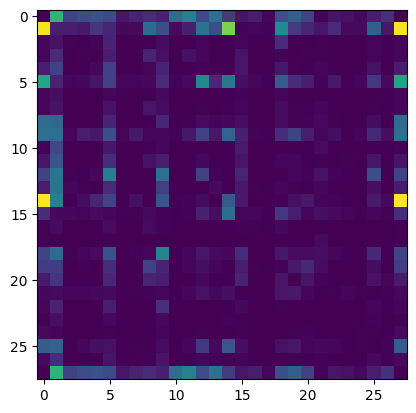

In [21]:
# Intro to Matplotlib

import matplotlib.pyplot as plt

plt.imshow(pairs)

In [22]:
# Intro to PyTorch

import torch as t

data = t.zeros((27, 27), dtype=t.int32)

strset = sorted(list(set(''.join(words))))
mapstrtoint = {s:(i + 1) for i, s in enumerate(strset)}
mapstrtoint['#'] = 0

for w in words:
    chars = ['#'] + list(w) + ['#']
    for c1, c2 in zip(chars, chars[1:]):
        i1 = mapstrtoint[c1]
        i2 = mapstrtoint[c2]
        data[i1, i2] += 1

data

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

(-0.5, 26.5, 26.5, -0.5)

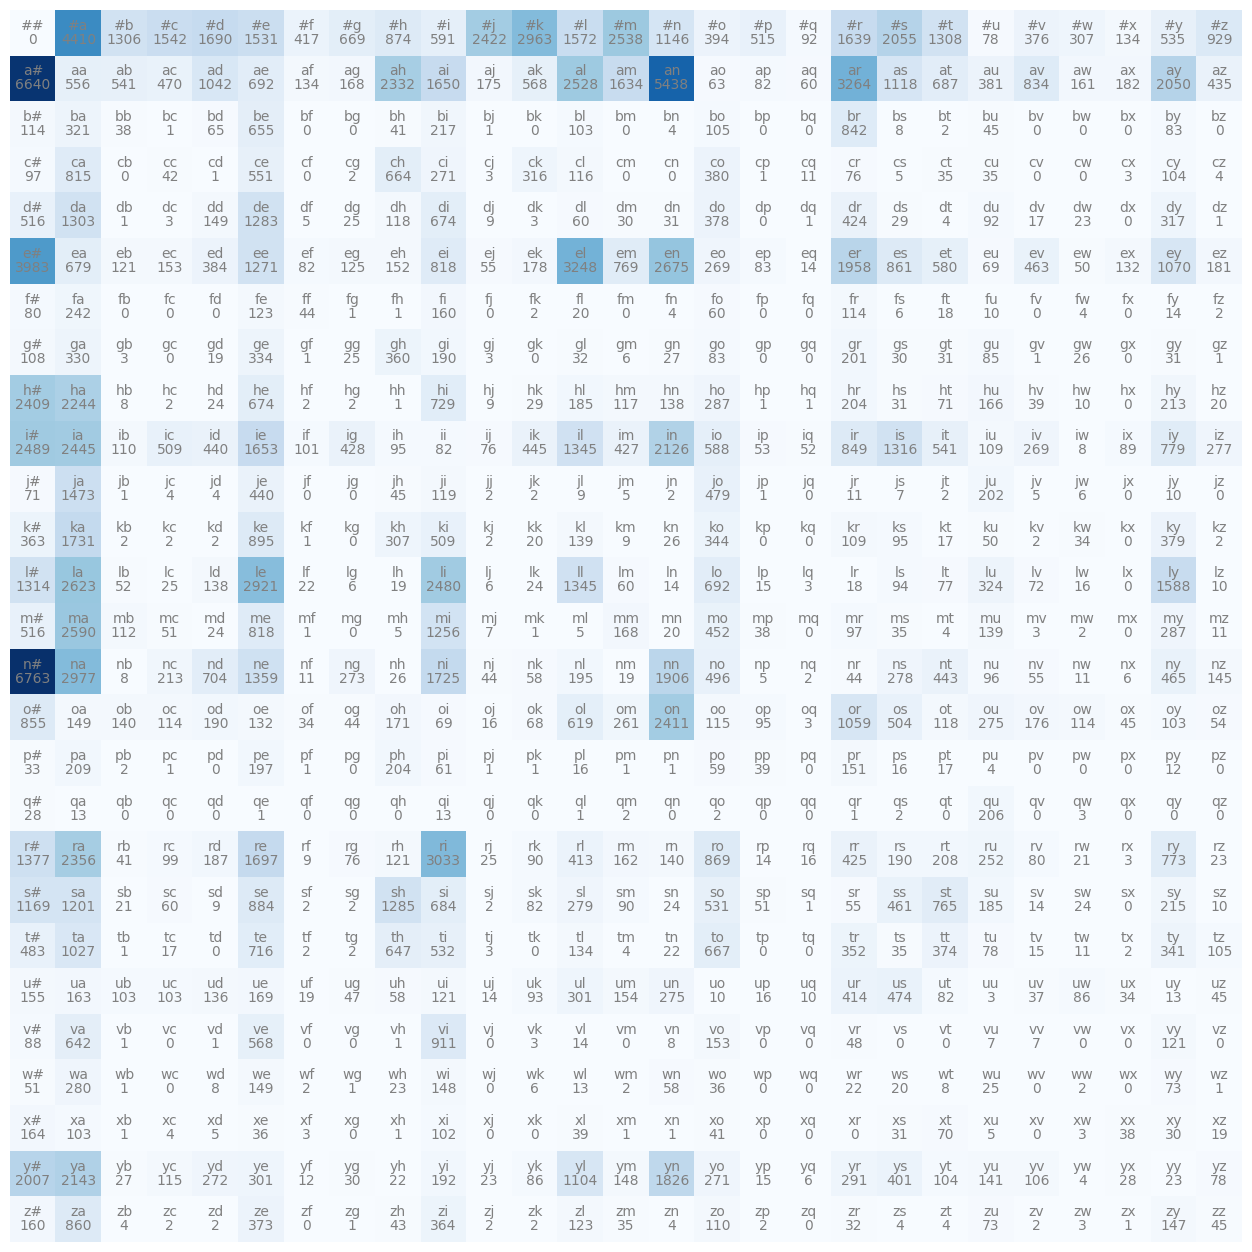

In [23]:
# Plotting the PyTorch tensor

mapinttostr = {i:s for s, i in mapstrtoint.items()}

plt.figure(figsize=(16,16))
plt.imshow(data, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = mapinttostr[i] + mapinttostr[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, data[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [24]:
# Sampling starting characters

# Creating normalized probabilities of each starting character
prob = data[0].float()
prob /= prob.sum()
prob

# Using a deterministic seed generator
gen = t.Generator().manual_seed(1)

# Sampling a starting character from prob tensor
sample_indices = t.multinomial(prob, num_samples=100, replacement=True, generator=gen)

print(sample_indices)

sample_characters = [mapinttostr[i] for i in sample_indices.tolist()]
p.DataFrame(sample_characters).value_counts()

tensor([ 1,  3,  4,  2, 11,  1, 10, 14, 12, 11, 11,  6, 14,  8,  1,  1, 13,  3,
        11, 14, 20, 26, 20, 19, 19,  2,  2, 26, 18, 10, 10, 10, 16, 20, 25,  2,
        24,  5, 10,  5,  3,  4,  7, 10, 10,  5, 18,  5,  8,  5, 13,  4, 10, 19,
        15,  5, 18, 11, 20,  1, 12, 26,  1,  4,  5, 11, 10, 11, 11,  4,  2, 11,
         4, 11, 10, 13, 11,  3, 13, 19,  1,  5, 22, 11, 18, 18, 14, 26, 14,  4,
        26, 11, 10, 11, 19, 10,  1, 20, 19, 20])


k    14
j    12
a     8
e     8
d     7
t     6
s     6
b     5
r     5
n     5
z     5
c     4
m     4
l     2
h     2
o     1
p     1
g     1
f     1
v     1
x     1
y     1
dtype: int64

In [25]:
# Creating the normalized and smoothed data (normalized for each row)

# Smoothed by adding a fake 1 to each bigram occurence
normalized_data = (data + 1).float()
for row in normalized_data:
    row /= row.sum()

normalized_data

tensor([[3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02],
        [1.9583e-01, 1.6425e-02, 1.5983e-02, 1.3889e-02, 3.0756e-02, 2.0435e-02,
         3.9809e-03, 4.9835e-03, 6.8796e-02, 4.8685e-02, 5.1899e-03, 1.6779e-02,
         7.4575e-02, 4.8213e-02, 1.6039e-01, 1.8872e-03, 2.4475e-03, 1.7988e-03,
         9.6279e-02, 3.2997e-02, 2.0288e-02, 1.1264e-02, 2.4623e-02, 4.7771e-03,
         5.3963e-03, 6.0480e-02, 1.2857e-02],
        [4.3039e-02, 1.2051e-01, 1.4596e-02, 7.4850e-04, 2.4701e-02, 2.4551e-01,
         3.7425e-04, 3.7425e-04, 1.5719e-02, 8.1587e-02, 7.4850e-04, 3.7425e-04,
         3.8922e-02, 3.7425e-04, 1.8713e-03, 3.9671e-02, 3.7425e-04, 3.7425e-04,
         3.1549e-

In [26]:
# Finally, the model in action

gen = t.Generator().manual_seed(1)

generated_names = []
for i in range(10):
    prob = normalized_data[0]

    sample_ind = t.multinomial(prob, num_samples=1, replacement=True, generator=gen)
    result = ''
    while sample_ind != 0:
        result += mapinttostr[sample_ind.item()]
        prob = normalized_data[sample_ind.item()]
        sample_ind = t.multinomial(prob, num_samples=1, replacement=True, generator=gen)

    generated_names += [result]

print(generated_names)

# As you can see, the Bigram model is terrible.

['abe', 'kallikegle', 'an', 'kivzussa', 'zmaieruwayaldaddelcleiciaisolono', 'ly', 'dalelia', 'kamancann', 'ewhlllyn', 'zelish']


In [27]:
# Summarizing the quality of the Bigram model
# using the average negative log likelihood

log_likelihood = 0.0
n = 0

# You can evaluate the model's loss with any string.
# Here we will evaluate with our dataset.
evaluate = words

for w in evaluate:
    chars = ['#'] + list(w) + ['#']
    for c1, c2 in zip(chars, chars[1:]):
        i1 = mapstrtoint[c1]
        i2 = mapstrtoint[c2]
        bigram_prob = normalized_data[i1, i2]

        # Take the log-likelihood because addition is
        # easier than multiplication:
        # log(a*b*c*...) = log(a) + log(b) + log(c) + ...
        log_bigram_prob = t.log(bigram_prob)
        
        log_likelihood += log_bigram_prob
        n += 1

avg_negative_log_likelihood = -log_likelihood / n

print(f'The model\'s loss is {avg_negative_log_likelihood.item()}')

The model's loss is 2.4543561935424805


# Part 2 - Letting a neural network code for you.

The neural network will take an input character and output the probabilities of a next character in the sequence. Our goal is to minimize the loss above as close as possible to 0. We optimize (tune the weights) using gradient descent.


In [28]:
# Create the training set of bigrams

inputs = []
labels = []

dataset = words

for w in dataset:
    chars = ['#'] + list(w) + ['#']
    for c1, c2 in zip(chars, chars[1:]):
        i1 = mapstrtoint[c1]
        i2 = mapstrtoint[c2]
        inputs.append(i1)
        labels.append(i2)

# These are the input character indices the model receives.
inputs = t.tensor(inputs)

# These are the target character indices given the input indices
# above that the model should predict optimally when performing and
# to maximize the probabilities the model outputs when training by
# doing gradient descent.
labels = t.tensor(labels)

num_of_ex = inputs.nelement()

In [29]:
# One-hot encode

import torch.nn.functional as F

inputs_enc = F.one_hot(inputs, num_classes=27).float()

In [30]:
# Init weights for 27 neurons (for all 27 characters)
# Each neuron has 27 weights and inputs.

# requires_grad tells PyTorch that we are interested in calculating
# the gradients of the elements in the tensor.

weights = t.randn((27, 27), requires_grad=True)

## Forward-pass

In [31]:
# Matrix mul. operator to produce log-counts

logits = inputs_enc @ weights

# Then exponentiate the outputs. We can interpret this 
# as 'counts' because every value becomes positive.
# All negative numbers turn into numbers between 0 and 1
# All positive numbers turn into numbers greater than 1
counts = logits.exp()

In [32]:
# Creating the normalized data again

# What we have is a probability distribution of each
# character's occurence for each batch bigram examples fed in.

normalized_counts = counts / counts.sum(1, keepdims=True)

# The last two steps of exponentiating and normalizing
# is called softmax activation function.

# Now we want to optimize the weights so that the output
# probability distribution, which is interpreted as the
# chance of the 27 characters are to come next (each row), are 
# in accordance with what we expect.

In [33]:
# Calculate loss
# We take the neural network's probability prediction
# of the expected character output of each bigram.
# (the second character's index for each bigram fed in earlier)

loss = -normalized_counts[t.arange(num_of_ex), labels].log().mean()

loss.item()

3.8457531929016113

## Backward-pass

In [34]:
# Set all the weights' gradient to zero (otherwise it's accumulate)
# and do backpropogation

weights.grad = None
loss.backward()

# Each gradient tells how much the corresponding weight
# affects the loss.

# So now, we nudge each weight on the direction of gradient direction
# according to its gradient. If the gradient of a weight is positive,
# increasing it would increase the loss, so we want to subtract it by
# a small amount, and vice versa.

In [200]:
# Iterate over all the weights and nudge accordingly

weights.data += -0.1 * weights.grad

## Combining the two passes

In [36]:
for i in range(1000):
    # Forward-pass

    # Must recalculate after nudging the weights
    inputs_enc = F.one_hot(inputs, num_classes=27).float()

    logits = inputs_enc @ weights
    
    # counts = logits.exp()
    # normalized_counts = counts / counts.sum(1, keepdims=True)
    # loss = -normalized_counts[t.arange(num_of_ex), labels].log().mean()

    # The cross_entropy function does the exact same
    # thing as the three commented lines above!
    loss = F.cross_entropy(logits, labels)
    print(f'The loss now: {loss.item()}')

    # Backward-pass

    weights.grad = None
    loss.backward()

    # Update / nudge weights
    weights.data += -60 * weights.grad

The loss now: 3.8457531929016113
The loss now: 3.4048330783843994
The loss now: 3.13919997215271
The loss now: 2.9784700870513916
The loss now: 2.8704233169555664
The loss now: 2.795353412628174
The loss now: 2.7421340942382812
The loss now: 2.7033095359802246
The loss now: 2.6740171909332275
The loss now: 2.651113510131836
The loss now: 2.632582664489746
The loss now: 2.617166757583618
The loss now: 2.6040782928466797
The loss now: 2.5928053855895996
The loss now: 2.582994222640991
The loss now: 2.5743885040283203
The loss now: 2.5667922496795654
The loss now: 2.560048818588257
The loss now: 2.554032564163208
The loss now: 2.548638105392456
The loss now: 2.5437793731689453
The loss now: 2.539382219314575
The loss now: 2.5353846549987793
The loss now: 2.53173565864563
The loss now: 2.528390645980835
The loss now: 2.5253117084503174
The loss now: 2.5224671363830566
The loss now: 2.519831418991089
The loss now: 2.5173802375793457
The loss now: 2.515094518661499
The loss now: 2.5129573345

In [37]:
# Finally, the model in action, again

gen = t.Generator().manual_seed(1)

nn_normalized_data = weights.exp()
nn_normalized_data /= nn_normalized_data.sum(1, keepdims=True)

generated_names = []
for i in range(10):
    prob = nn_normalized_data[0]

    sample_ind = t.multinomial(prob, num_samples=1, replacement=True, generator=gen)
    result = ''
    while sample_ind != 0:
        result += mapinttostr[sample_ind.item()]
        prob = nn_normalized_data[sample_ind.item()]
        sample_ind = t.multinomial(prob, num_samples=1, replacement=True, generator=gen)

    generated_names += [result]

print(generated_names)

['abe', 'kallikegle', 'an', 'kivzussa', 'zmaieruwayaldaddelcleiciaisolono', 'ly', 'dalelia', 'kamancann', 'ewhlllyn', 'zelish']


(-0.5, 26.5, 26.5, -0.5)

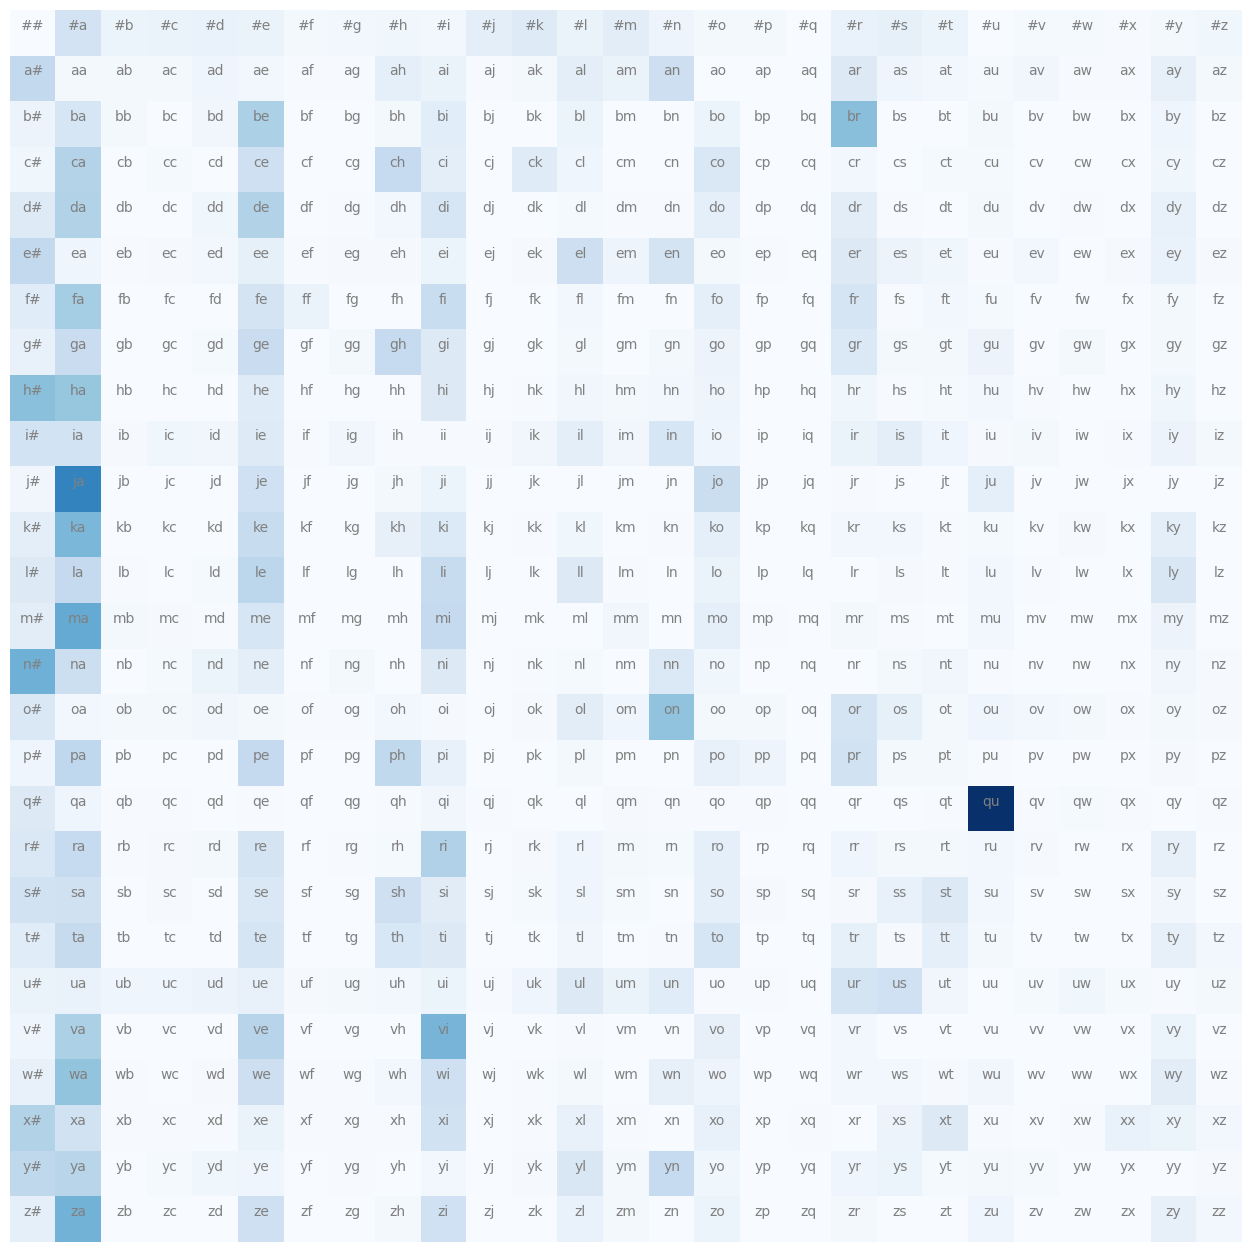

In [38]:
# And so it just happens that the previous bigram model is actually
# the fully optimized version of this neural network model.

nn_data = nn_normalized_data.detach() * len(words)

plt.figure(figsize=(16,16))
plt.imshow(nn_data, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = mapinttostr[i] + mapinttostr[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
plt.axis('off')

# Part 3 - The Multi-Layer Perceptron.

## The how-to

### Build the dataset

In [47]:
# Rebuilding a new dataset for the MLP

# Characters to read to predict the next one.
block_size = 3

mlp_inputs = []
mlp_labels = []

# Limit to the first word for this example
for w in words[:1]:
    # 0 represents empty character '#' as in the Bigram Model
    context = [0] * block_size
    for c in w + '#':
        index = mapstrtoint[c]
        mlp_inputs.append(context)
        mlp_labels.append(index)
        print(context)
        context = context[1:] + [index]

mlp_inputs = t.tensor(mlp_inputs)
mlp_labels = t.tensor(mlp_labels)

print(mlp_inputs)
print(mlp_labels)
    

[0, 0, 0]
[0, 0, 5]
[0, 5, 13]
[5, 13, 13]
[13, 13, 1]
tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1]])
tensor([ 5, 13, 13,  1,  0])


### Build the layers and do forward-pass

In [64]:
# Create a lookup table to embed the 27 possible
# characters in a smaller dimension (2)

lookup = t.randn((27, 2))

# THis maps a block into 3 × 2 arrays.
emb = lookup[mlp_inputs]

emb

tensor([[[-0.5614, -0.7491],
         [-0.5614, -0.7491],
         [-0.5614, -0.7491]],

        [[-0.5614, -0.7491],
         [-0.5614, -0.7491],
         [-0.6555,  0.8400]],

        [[-0.5614, -0.7491],
         [-0.6555,  0.8400],
         [-1.1553,  1.4623]],

        [[-0.6555,  0.8400],
         [-1.1553,  1.4623],
         [-1.1553,  1.4623]],

        [[-1.1553,  1.4623],
         [-1.1553,  1.4623],
         [ 0.6112, -1.9339]]])

In [54]:
# Remove a dimension from emb and create the hidden layer

num_neurons_hidden = 100
weights_hidden = t.randn((6, num_neurons_hidden))
biases_hidden = t.randn(num_neurons_hidden)

# Convert each 3 × 2 arrays into a 6 × 1 array,
# then create the hidden layer.
hidden = t.tanh(emb.view(emb.shape[0], emb.shape[1] * emb.shape[2]) @ weights_hidden + biases_hidden)

print(hidden.shape)
hidden

torch.Size([5, 100])


tensor([[-0.8521, -0.9959, -0.7797, -0.4048, -0.1415,  0.9896, -0.6103, -0.7265,
          0.4224, -0.8886,  0.7546, -0.6627, -0.8088, -0.8898,  0.9413, -0.6879,
          0.0795, -0.9463,  0.4191,  0.7850,  0.4878, -0.5757,  0.9308, -0.9909,
          0.8160, -0.9000, -0.8881,  0.3278,  0.6102,  0.8396, -0.0116, -0.7365,
          0.3989, -0.7242, -0.9937,  0.8243,  0.8650, -0.6172, -0.6115,  0.3350,
         -0.8962, -0.2589, -0.8840,  0.8312,  0.1147, -0.3227, -0.9793,  0.4832,
         -0.3086, -0.0439,  0.5685, -0.9924,  0.9927,  0.4833,  0.7871,  0.5602,
          0.4794, -0.4167,  0.1812,  0.9909,  0.5488,  0.8994, -0.9939, -0.3313,
          0.7769,  0.3375, -0.6363,  0.9801, -0.8599, -0.2250, -0.7879,  0.7964,
         -0.3522, -0.2151, -0.8115,  0.9783, -0.9527, -0.9762, -0.8878, -0.8801,
         -0.1438,  0.9998,  0.4281, -0.2950,  0.2821, -0.4463,  0.3450,  0.8694,
         -0.6065,  0.0044, -0.4939, -0.5680,  0.4298,  0.4902,  0.8405, -0.7434,
         -0.3535, -0.9994,  

In [57]:
# Create the final layer

weights_final = t.randn((num_neurons_hidden, 27))
biases_final = t.randn(27)

mlp_logits = hidden @ weights_final + biases_final

print(mlp_logits.shape)
mlp_logits

torch.Size([5, 27])


tensor([[  3.8067,  -2.1045,  -0.8119,   1.6872,  -4.9960,   2.2252,  -1.3577,
          -1.3475,   3.6793,   1.9754,  -2.3924,  -9.6735,   1.7260,   0.3450,
         -20.3918,  12.5257,  -4.7446,  11.0577,   1.7972,  -8.7786,   2.8065,
           4.3380, -11.1190,  -6.9938,  -2.9463, -13.1247,   8.6144],
        [ -1.4176,   7.7512,   0.6578,   3.1462,   0.1282,   7.2621,   5.2613,
           1.8526,   0.0333,  -1.6121, -13.6456,   1.2226, -10.4092,   6.4716,
         -17.6716,   0.7583,   6.0735,  12.7581,  -5.0039,   2.5676,   7.3527,
          -4.5047,   1.8192,  -3.8897, -11.4897, -16.7637,  -1.4993],
        [ -5.1820,   6.3975,  -9.4664,  10.8035,  -4.2314,   8.3628,  -7.8204,
           9.0842,  -0.1960,  -3.0257,   2.5446,   1.1548, -20.8563,  -4.0101,
          -0.4427,   2.8319,  -3.6693,   5.8015,   6.6542,  -1.8458,   8.6244,
           3.4037,  15.3415, -16.7937,  10.7887,  -5.1559,   6.5737],
        [  5.3308,   2.9010,  -2.0254,   9.5896,   3.2992,   2.8854,  -6.6929,


In [60]:
# Do softmax

mlp_counts = mlp_logits.exp()
mlp_normalized_counts = mlp_counts / mlp_counts.sum(1, keepdims=True)
mlp_normalized_counts.shape

torch.Size([5, 27])

In [63]:
loss = -mlp_normalized_counts[t.arange(5), mlp_labels].log().mean()
loss

tensor(11.7734)

### Do backward-pass etc.

## Putting it together again

### Create dataset

In [89]:
# Rebuilding a new dataset for the MLP

# Characters to read to predict the next one.
block_size = 3

mlp_inputs = []
mlp_labels = []

# Limit to the first word for this example
for w in words:
    # 0 represents empty character '#' as in the Bigram Model
    context = [0] * block_size
    for c in w + '#':
        index = mapstrtoint[c]
        mlp_inputs.append(context)
        mlp_labels.append(index)
        context = context[1:] + [index]

mlp_inputs = t.tensor(mlp_inputs)
mlp_labels = t.tensor(mlp_labels)

mlp_num_of_ex = mlp_inputs.shape[0]

### Build layers

In [92]:
lookup = t.randn((27, 2), requires_grad=True)

num_neurons_hidden = 100
weights_hidden = t.randn((6, num_neurons_hidden), requires_grad=True)
biases_hidden = t.randn(num_neurons_hidden, requires_grad=True)

weights_final = t.randn((num_neurons_hidden, 27), requires_grad=True)
biases_final = t.randn(27, requires_grad=True)

mlp_params = [lookup, weights_hidden, biases_hidden, weights_final, biases_hidden]

### Train

In [96]:
for i in range(100):
    # (dataset blocks, 3, 2)
    emb = lookup[mlp_inputs]
    # (dataset blocks, 100)
    hidden = t.tanh(emb.view(emb.shape[0], emb.shape[1] * emb.shape[2]) @ weights_hidden * biases_hidden)
    # (dataset blocks, 27)
    mlp_logits = hidden @ weights_final + biases_final
    
    # mlp_counts = mlp_logits.exp()
    # mlp_normalized_counts = mlp_counts / mlp_counts.sum(1, keepdims=True)
    # loss = -mlp_normalized_counts[t.arange(mlp_num_of_ex), mlp_labels].log().mean()
    
    # The cross_entropy function does the exact same
    # thing as the three commented lines above!
    loss = F.cross_entropy(mlp_logits, mlp_labels)
    print(loss.item())

    for p in mlp_params:
        p.grad = None

    loss.backward()

    for p in mlp_params:
        p.data += -0.05 * p.grad


2.814925193786621
2.814180612564087
2.8134396076202393
2.8127009868621826
2.811966896057129
2.8112354278564453
2.810507297515869
2.8097825050354004
2.809061050415039
2.808342456817627
2.8076276779174805
2.806915760040283
2.8062074184417725
2.805501699447632
2.804799795150757
2.804100751876831
2.8034050464630127
2.8027122020721436
2.802022695541382
2.8013358116149902
2.800652027130127
2.799971342086792
2.7992935180664062
2.798619031906128
2.7979469299316406
2.7972774505615234
2.7966115474700928
2.795948028564453
2.7952873706817627
2.7946293354034424
2.793973922729492
2.793321132659912
2.7926712036132812
2.7920238971710205
2.7913787364959717
2.790735960006714
2.7900960445404053
2.7894582748413086
2.788822889328003
2.7881903648376465
2.7875595092773438
2.786931037902832
2.7863051891326904
2.7856814861297607
2.7850592136383057
2.7844395637512207
2.7838220596313477
2.7832067012786865
2.782593250274658
2.781981945037842
2.7813720703125
2.780764579772949
2.780158758163452
2.779555082321167
2.

## This is ridiculous.

Instead of training over the entire dataset, neural networks usually train using batches of the dataset. This results in a more inaccurate gradient descent in exchange for less training time, but more steps to reach a particular loss.

In [160]:
for i in range(100):
    # Batch the dataset
    batch = t.randint(0, mlp_inputs.shape[0], (64,))

    # (batch blocks, 3, 2)
    emb = lookup[mlp_inputs[batch]]
    # (batch blocks, 100)
    hidden = t.tanh(emb.view(emb.shape[0], emb.shape[1] * emb.shape[2]) @ weights_hidden * biases_hidden)
    # (batch blocks, 27)
    mlp_logits = hidden @ weights_final + biases_final
    
    loss = F.cross_entropy(mlp_logits, mlp_labels[batch])
    print(f'Current batch loss: {loss.item()}')

    for p in mlp_params:
        p.grad = None

    loss.backward()

    for p in mlp_params:
        p.data += -0.01 * p.grad


Current batch loss: 2.5266449451446533
Current batch loss: 2.2955739498138428
Current batch loss: 2.371598958969116
Current batch loss: 2.412984848022461
Current batch loss: 2.264867067337036
Current batch loss: 2.4075863361358643
Current batch loss: 2.5370914936065674
Current batch loss: 2.5236847400665283
Current batch loss: 2.100099563598633
Current batch loss: 2.220745325088501
Current batch loss: 2.288332223892212
Current batch loss: 2.2164926528930664
Current batch loss: 2.452359437942505
Current batch loss: 2.2532896995544434
Current batch loss: 2.364582061767578
Current batch loss: 2.480278253555298
Current batch loss: 2.416548013687134
Current batch loss: 2.1949734687805176
Current batch loss: 2.472287178039551
Current batch loss: 2.1364195346832275
Current batch loss: 2.5165555477142334
Current batch loss: 2.1362972259521484
Current batch loss: 2.3814265727996826
Current batch loss: 2.0599780082702637
Current batch loss: 2.3391778469085693
Current batch loss: 2.19774317741394

In [161]:
# View the actual loss

emb = lookup[mlp_inputs]
hidden = t.tanh(emb.view(emb.shape[0], emb.shape[1] * emb.shape[2]) @ weights_hidden * biases_hidden)
mlp_logits = hidden @ weights_final + biases_final

loss = F.cross_entropy(mlp_logits, mlp_labels)

loss.item()

2.321479558944702

## Estimating the learning rate

It might be difficult for humans to know the optimal step size for a gradient descent when training a neural network. We can determine an optimal learning rate by testing various step sizes on the neural network.

In [104]:
# Create an array of learning rate step sizes

# The learning rate exponent
lre = t.linspace(-3, 0, 1000)

# the learning rates
lrs = 10 ** lre

In [135]:
learning_rate_hist = []
learning_rate_exp_hist = []
loss_hist = []

for i in range(1000):
    # Batch the dataset
    batch = t.randint(0, mlp_inputs.shape[0], (64,))

    # (batch blocks, 3, 2)
    emb = lookup[mlp_inputs[batch]]
    # (batch blocks, 100)
    hidden = t.tanh(emb.view(emb.shape[0], emb.shape[1] * emb.shape[2]) @ weights_hidden * biases_hidden)
    # (batch blocks, 27)
    mlp_logits = hidden @ weights_final + biases_final
    
    loss = F.cross_entropy(mlp_logits, mlp_labels[batch])
    print(f'Current batch loss: {loss.item()}')

    for p in mlp_params:
        p.grad = None

    loss.backward()

    # Test various learning rates
    learning_rate = lrs[i]
    for p in mlp_params:
        p.data += -learning_rate * p.grad

    # Track learning rate statistics
    learning_rate_hist.append(learning_rate)
    learning_rate_exp_hist.append(lre[i])
    loss_hist.append(loss.item())


Current batch loss: 6.505096912384033
Current batch loss: 6.472597599029541
Current batch loss: 5.901927471160889
Current batch loss: 6.87558650970459
Current batch loss: 5.825592994689941
Current batch loss: 6.635153770446777
Current batch loss: 6.565053462982178
Current batch loss: 6.06443977355957
Current batch loss: 6.319289207458496
Current batch loss: 5.560191631317139
Current batch loss: 6.455743312835693
Current batch loss: 5.634941101074219
Current batch loss: 5.774251461029053
Current batch loss: 5.978490829467773
Current batch loss: 6.174455642700195
Current batch loss: 5.561184883117676
Current batch loss: 5.769635200500488
Current batch loss: 5.291252136230469
Current batch loss: 5.616987705230713
Current batch loss: 5.639160633087158
Current batch loss: 5.620867729187012
Current batch loss: 6.250338554382324
Current batch loss: 6.3873186111450195
Current batch loss: 5.62065315246582
Current batch loss: 6.146969795227051
Current batch loss: 5.826770305633545
Current batch 

Estimate optimal learning rate exponent: -0.7957957983016968
Estimate optimal learning rate: 0.1600310355424881


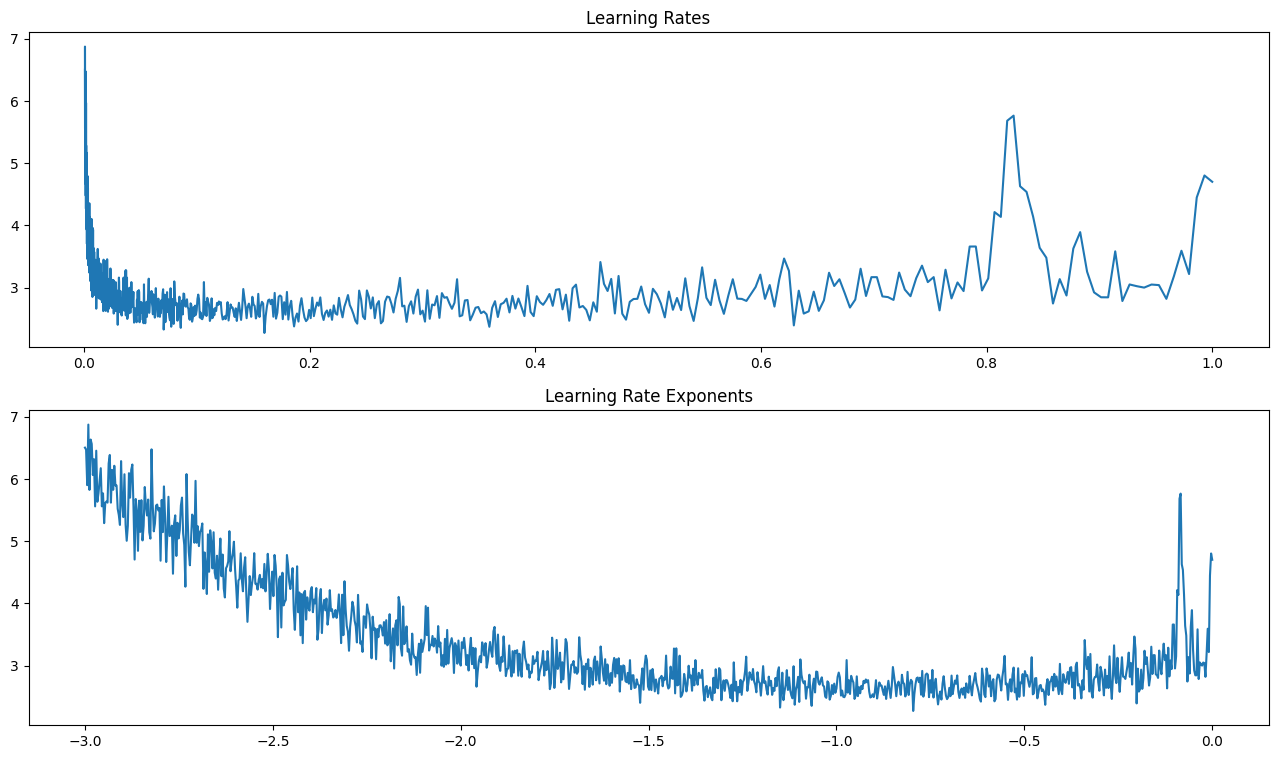

In [140]:
# Visualize the statistics obtained from above

plt.figure(0, figsize=(16, 9))

plt.subplot(2, 1, 1)
plt.plot(learning_rate_hist, loss_hist)
plt.title('Learning Rates')

plt.subplot(2, 1, 2)
plt.plot(learning_rate_exp_hist, loss_hist)
plt.title('Learning Rate Exponents')

# The minimum point along the y-axis is the estimate optimal learning rate.
optimal = 100
min_loss = 100
for i, l in zip(learning_rate_exp_hist, loss_hist):
    if min_loss > l:
        min_loss = l
        optimal = i

print(f'Estimate optimal learning rate exponent: {optimal}')
print(f'Estimate optimal learning rate: {10 ** optimal}')


As the learning rate increases, the gradient descent becomes increasingly unstable as well, but if the learning rate is too low, there would be not much of gradient descent happening.

### Training with the optimal learning rate for much longer and applying learning rate decay

In [163]:
# Initial estimate of the optimal learning rate
optimal_learning_rate = 10 ** optimal
# Apply learning rate decay here,
# optimal_learning_rate *= 0.0000001
for i in range(50000):
    # Batch the dataset
    batch = t.randint(0, mlp_inputs.shape[0], (64,))

    # (batch blocks, 3, 2)
    emb = lookup[mlp_inputs[batch]]
    # (batch blocks, 100)
    hidden = t.tanh(emb.view(emb.shape[0], emb.shape[1] * emb.shape[2]) @ weights_hidden * biases_hidden)
    # (batch blocks, 27)
    mlp_logits = hidden @ weights_final + biases_final
    
    loss = F.cross_entropy(mlp_logits, mlp_labels[batch])
    print(f'Current batch loss: {loss.item()}')

    # Overfitting the training set!
    if loss < 1.8:
        break

    for p in mlp_params:
        p.grad = None

    loss.backward()

    for p in mlp_params:
        p.data += -optimal_learning_rate * p.grad

# View the actual loss

emb = lookup[mlp_inputs]
hidden = t.tanh(emb.view(emb.shape[0], emb.shape[1] * emb.shape[2]) @ weights_hidden * biases_hidden)
mlp_logits = hidden @ weights_final + biases_final

loss = F.cross_entropy(mlp_logits, mlp_labels)

print(f'\nCurrent actual loss: {loss.item()}')


Current batch loss: 2.2814650535583496
Current batch loss: 2.2334301471710205
Current batch loss: 2.005610704421997
Current batch loss: 2.3126399517059326
Current batch loss: 2.416959762573242
Current batch loss: 2.2611846923828125
Current batch loss: 2.3604037761688232
Current batch loss: 2.363208770751953
Current batch loss: 2.25213623046875
Current batch loss: 2.322553873062134
Current batch loss: 2.1847400665283203
Current batch loss: 2.340782880783081
Current batch loss: 2.3171632289886475
Current batch loss: 2.255476474761963
Current batch loss: 2.3853230476379395
Current batch loss: 2.3222508430480957
Current batch loss: 2.1855835914611816
Current batch loss: 2.3124146461486816
Current batch loss: 2.0201683044433594
Current batch loss: 2.1312015056610107
Current batch loss: 2.3776183128356934
Current batch loss: 2.3785789012908936
Current batch loss: 2.412219524383545
Current batch loss: 2.3906679153442383
Current batch loss: 2.219447612762451
Current batch loss: 2.2490272521972

## Combatting overfitting

As a neural network model's capacity grows, it might approach a loss of near zero over the training dataset. This, however, would make the model useless as it only samples exact copies of the training dataset and would not produce any new interesting data. The model would also most likely has a big loss over new data it never encountered.

To combat this, people usually split the dataset into three: Training split, dev/validation split, and test split, with roughly an 8:1:1 ratio. The training split is used for optimizing the parameters of a model when training, the dev/validation split is used for developing the hyperparameters of a model, and the test split is used for evaluating the performance of the model at the end of training.

In [153]:
# Rebuilding the split dataset

import random

def build_dataset(words):
    block_size = 3

    mlp_inputs = []
    mlp_labels = []

    for w in words:
        context = [0] * block_size
        for c in w + '#':
            index = mapstrtoint[c]
            mlp_inputs.append(context)
            mlp_labels.append(index)
            context = context[1:] + [index]

    mlp_inputs = t.tensor(mlp_inputs)
    mlp_labels = t.tensor(mlp_labels)
    print(mlp_inputs.shape, mlp_labels.shape)

    return mlp_inputs, mlp_labels

# Split the dataset
random.seed()
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

trn_inputs, trn_labels = build_dataset(words[:n1])
dev_inputs, dev_labels = build_dataset(words[n1:n2])
tes_inputs, tes_labels = build_dataset(words[n2:])

torch.Size([182581, 3]) torch.Size([182581])
torch.Size([22780, 3]) torch.Size([22780])
torch.Size([22785, 3]) torch.Size([22785])


### Resetting the model's parameters

In [164]:
lookup = t.randn((27, 2), requires_grad=True)

num_neurons_hidden = 100
weights_hidden = t.randn((6, num_neurons_hidden), requires_grad=True)
biases_hidden = t.randn(num_neurons_hidden, requires_grad=True)

weights_final = t.randn((num_neurons_hidden, 27), requires_grad=True)
biases_final = t.randn(27, requires_grad=True)

mlp_params = [lookup, weights_hidden, biases_hidden, weights_final, biases_hidden]

### Training using the appropriate training set

In [171]:
# Change mlp_inputs, mlp_labels -> trn_inputs, trn_labels

# Initial estimate of the optimal learning rate
optimal_learning_rate = 10 ** optimal
# Apply learning rate decay here,
optimal_learning_rate *= 0.0000001
for i in range(10000):
    # Batch the dataset
    batch = t.randint(0, trn_inputs.shape[0], (64,))

    # (batch blocks, 3, 2)
    emb = lookup[trn_inputs[batch]]
    # (batch blocks, 100)
    hidden = t.tanh(emb.view(emb.shape[0], emb.shape[1] * emb.shape[2]) @ weights_hidden * biases_hidden)
    # (batch blocks, 27)
    mlp_logits = hidden @ weights_final + biases_final
    
    loss = F.cross_entropy(mlp_logits, trn_labels[batch])
    print(f'Current batch loss: {loss.item()}')

    # Overfitting the training set!
    # if loss < 1.8:
    #     break

    for p in mlp_params:
        p.grad = None

    loss.backward()

    for p in mlp_params:
        p.data += -optimal_learning_rate * p.grad

Current batch loss: 2.4557721614837646
Current batch loss: 2.5166521072387695
Current batch loss: 2.3736371994018555
Current batch loss: 2.235778570175171
Current batch loss: 2.3244948387145996
Current batch loss: 2.3275961875915527
Current batch loss: 2.3398544788360596
Current batch loss: 2.5197579860687256
Current batch loss: 2.114633083343506
Current batch loss: 2.5083236694335938
Current batch loss: 2.1735610961914062
Current batch loss: 2.3897476196289062
Current batch loss: 2.441070079803467
Current batch loss: 2.5226380825042725
Current batch loss: 2.189286947250366
Current batch loss: 2.4090378284454346
Current batch loss: 2.255913257598877
Current batch loss: 2.512585163116455
Current batch loss: 2.530078887939453
Current batch loss: 2.307612895965576
Current batch loss: 2.4012703895568848
Current batch loss: 2.3588247299194336
Current batch loss: 2.377207040786743
Current batch loss: 2.3576810359954834
Current batch loss: 2.2921547889709473
Current batch loss: 2.149174690246

In [172]:
# View the actual loss using the test set
# Change mlp_inputs, mlp_labels -> dev_inputs, dev_labels

emb = lookup[dev_inputs]
hidden = t.tanh(emb.view(emb.shape[0], emb.shape[1] * emb.shape[2]) @ weights_hidden * biases_hidden)
mlp_logits = hidden @ weights_final + biases_final

loss = F.cross_entropy(mlp_logits, dev_labels)

print(f'\nCurrent actual loss: {loss.item()}')


Current actual loss: 2.3554673194885254


## Combatting underfitting

As a model reaches its limit, it will stay in a particular loss value. When the model's training loss is roughly equal to the test loss, it is said to be underfitted because it is not powerful enough, usually because the network is too small.

By scaling the neural network and tuning the hyperparameters, the model can potentially perform better.

In [173]:
lookup = t.randn((27, 2), requires_grad=True)

# Increase the number of hidden neurons
num_neurons_hidden = 400
weights_hidden = t.randn((6, num_neurons_hidden), requires_grad=True)
biases_hidden = t.randn(num_neurons_hidden, requires_grad=True)

weights_final = t.randn((num_neurons_hidden, 27), requires_grad=True)
biases_final = t.randn(27, requires_grad=True)

mlp_params = [lookup, weights_hidden, biases_hidden, weights_final, biases_hidden]

print(f'Total number of parameters: {sum(p.nelement() for p in mlp_params)}')

Total number of parameters: 14054


In [103]:
# Finally, the model in action, again

gen = t.Generator().manual_seed(1)

c = lookup[[0, 0, t.randint(0, 27, (1,))]]


mlp_normalized_data = F.softmax(weights_final, 1)

generated_names = []
for i in range(10):
    prob = mlp_normalized_data[0]

    sample_ind = t.multinomial(prob, num_samples=1, replacement=True, generator=gen)
    result = ''
    while sample_ind != 0:
        result += mapinttostr[sample_ind.item()]
        prob = mlp_normalized_data[sample_ind.item()]
        sample_ind = t.multinomial(prob, num_samples=1, replacement=True, generator=gen)

    generated_names += [result]

print(generated_names)

['', 'eiflalqmcplqgaeshgpwzxtydczxheotyxfyifffffgjitjkesifprdtow', 'ozfffligpifleqhomcpu', 'fwitwnyrbzvmcxgawrxxgjpppnhyoxszbaixgbhsszjkgbhevtvzgpczomahfokeffffoiymcqgeqmckesub', 'faw', 'yqgplikgtzvmifchdpo', 'edjkbpoxeqz', 'exnfoktrmjhssr', 'gwpubdtalxsalsxkabyuifjppowliflqgreifjkaltyawdpowqgple', 'sffdrvhmcejktyrrgmvvawqpzbsyqyvlqfwspopwjdchcmydrypukaujfoafppjpkqzvvjleivvvsvnktoxeotbhyvw']
